# Feature Selection

**Feature selection** is the process of selecting a subset of relevant features from a larger set to improve model performance or reduce computational complexity. *Types of feature selection* refers to various methodologies or approaches used to select a subset of features from the original feature set. These methodologies can be broadly categorized into three main types:

* Filter Methods
* Wrapper Methods
* Embedded Methods

# Categorical Feature Selection

# Import Necessary Librares

In [ ]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", 500)
pd.set_option("display.float_format", lambda x: "%.4f" % x)

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder # for y_ytain
from sklearn.preprocessing import OrdinalEncoder # for x_train
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

# Import Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/breast_cancer_all_categorical.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'


In [ ]:
def load_dataset(dir):
  df = pd.read_csv(dir)
  df_values = df.values
  samples = df_values[:,:-1]
  samples = samples.astype(str)
  target = df_values[:,-1]
  return samples, target

In [ ]:
samples, target = load_dataset("/content/drive/MyDrive/Colab Notebooks/datasets/breast_cancer_all_categorical.csv")

In [ ]:
samples[0:10]

array([["'50-59'", "'ge40'", "'15-19'", "'0-2'", "'no'", "'1'",
        "'right'", "'central'", "'no'"],
       ["'50-59'", "'ge40'", "'35-39'", "'0-2'", "'no'", "'2'", "'left'",
        "'left_low'", "'no'"],
       ["'40-49'", "'premeno'", "'35-39'", "'0-2'", "'yes'", "'3'",
        "'right'", "'left_low'", "'yes'"],
       ["'40-49'", "'premeno'", "'30-34'", "'3-5'", "'yes'", "'2'",
        "'left'", "'right_up'", "'no'"],
       ["'50-59'", "'premeno'", "'25-29'", "'3-5'", "'no'", "'2'",
        "'right'", "'left_up'", "'yes'"],
       ["'50-59'", "'ge40'", "'40-44'", "'0-2'", "'no'", "'3'", "'left'",
        "'left_up'", "'no'"],
       ["'40-49'", "'premeno'", "'10-14'", "'0-2'", "'no'", "'2'",
        "'left'", "'left_up'", "'no'"],
       ["'40-49'", "'premeno'", "'0-4'", "'0-2'", "'no'", "'2'",
        "'right'", "'right_low'", "'no'"],
       ["'40-49'", "'ge40'", "'40-44'", "'15-17'", "'yes'", "'2'",
        "'right'", "'left_up'", "'yes'"],
       ["'50-59'", "'premeno'", "

In [ ]:
target[0:10]

array(["'no-recurrence-events'", "'recurrence-events'",
       "'no-recurrence-events'", "'recurrence-events'",
       "'no-recurrence-events'", "'no-recurrence-events'",
       "'no-recurrence-events'", "'no-recurrence-events'",
       "'no-recurrence-events'", "'no-recurrence-events'"], dtype=object)

# Split Dataset

In [ ]:
def create_train_test(dir, test_size=0.33):
  samples, target = load_dataset(dir)
  x_train, x_test, y_train, y_test = train_test_split(samples, target, test_size=test_size, random_state=1)
  return x_train, x_test, y_train, y_test

In [ ]:
x_train, x_test, y_train, y_test = create_train_test("/content/drive/MyDrive/Colab Notebooks/datasets/breast_cancer_all_categorical.csv")

# Encoding

In [ ]:
def Data_Encoding(x_train, x_test):
  encoder_model = OrdinalEncoder()
  x_train = encoder_model.fit_transform(x_train)
  x_test = encoder_model.fit_transform(x_test)
  return x_train, x_test

In [ ]:
def Label_Encoding(y_train, y_test):
  encoder_model = LabelEncoder()
  y_train = encoder_model.fit_transform(y_train)
  y_test = encoder_model.fit_transform(y_test)
  return y_train, y_test

In [ ]:
X_train, X_test = Data_Encoding(x_train, x_test)
Y_train, Y_test = Label_Encoding(y_train, y_test)

# Filter Based Feature Selection

In [ ]:
def filter_based_feature_selection(x_train, y_train, x_test, score_func):
  model = SelectKBest(score_func=score_func, k='all')
  model.fit(x_train, y_train)
  x_train_model = model.transform(x_train)
  x_test_model = model.transform(x_test)
  return x_train_model, x_test_model, model

In [ ]:
x_train_model, x_test_model, model = filter_based_feature_selection(X_train, Y_train, X_test, score_func=f_classif)

In [ ]:
for i in range(len(model.scores_)):
  print(f"Feature: {i} Score: {model.scores_[i]}")


Feature: 0 Score: 0.26461155079705156
Feature: 1 Score: 0.35568561311861524
Feature: 2 Score: 6.510560666845982
Feature: 3 Score: 11.397986171323902
Feature: 4 Score: 6.900353678149434
Feature: 5 Score: 12.47028588356106
Feature: 6 Score: 1.8861077130075228
Feature: 7 Score: 3.731022010290476
Feature: 8 Score: 8.794624481304718


# Plot Results

In [ ]:
def plot_results(model, plot=True):
  output = pd.Series(model.scores_)
  output = output.sort_values(ascending=False)
  print("Features and Scores")
  for i, out in enumerate(output):
    print(f"Feature: {output.index[i]} Score: {out}")

  if plot:
    plt.bar([i for i in range(len(model.scores_))], model.scores_)
    plt.show()

Features and Scores
Feature: 5 Score: 12.47028588356106
Feature: 3 Score: 11.397986171323902
Feature: 8 Score: 8.794624481304718
Feature: 4 Score: 6.900353678149434
Feature: 2 Score: 6.510560666845982
Feature: 7 Score: 3.731022010290476
Feature: 6 Score: 1.8861077130075228
Feature: 1 Score: 0.35568561311861524
Feature: 0 Score: 0.26461155079705156


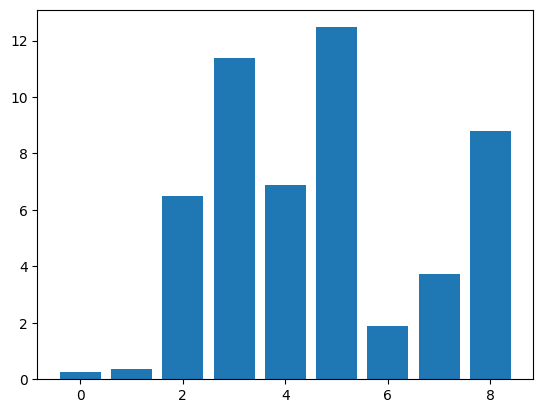

In [ ]:
plot_results(model)

# Process Functionalization

In [ ]:
def filter_based_FS(dir, score_func, test_size=0.33, plot=True):
  # Load Dataset
  df = pd.read_csv(dir)
  df_values = df.values
  samples = df_values[:,:-1]
  samples = samples.astype(str)
  target = df_values[:,-1]

  # Split Dataset
  x_train, x_test, y_train, y_test = train_test_split(samples, target, test_size=test_size, random_state=1)

  # Encoding
  encoder_model = OrdinalEncoder()
  X_train = encoder_model.fit_transform(x_train)
  X_test = encoder_model.fit_transform(x_test)

  encoder_model = LabelEncoder()
  Y_train = encoder_model.fit_transform(y_train)
  Y_test = encoder_model.fit_transform(y_test)

  # Filter Based Methods
  model = SelectKBest(score_func=score_func, k='all')
  model.fit(X_train, Y_train)
  x_train_model = model.transform(X_train)
  x_test_model = model.transform(X_test)

  # Plot Results
  output = pd.Series(model.scores_)
  output = output.sort_values(ascending=False)
  print("Features and Scores")
  for i, out in enumerate(output):
    print(f"Feature: {output.index[i]} Score: {out}")

  if plot:
    plt.bar([i for i in range(len(model.scores_))], model.scores_)
    plt.title(f"Feature Importance for Score Function: {score_func.__name__}")
    plt.xlabel("Feature Index")
    plt.ylabel("Score")
    plt.show()

Features and Scores
Feature: 5 Score: 12.47028588356106
Feature: 3 Score: 11.397986171323902
Feature: 8 Score: 8.794624481304718
Feature: 4 Score: 6.900353678149434
Feature: 2 Score: 6.510560666845982
Feature: 7 Score: 3.731022010290476
Feature: 6 Score: 1.8861077130075228
Feature: 1 Score: 0.35568561311861524
Feature: 0 Score: 0.26461155079705156


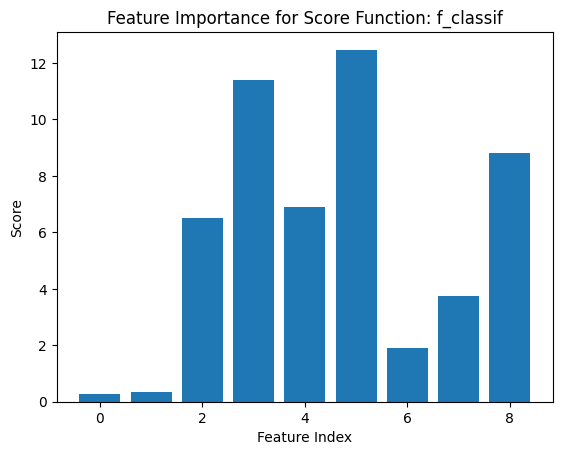

In [ ]:
dir = "/content/drive/MyDrive/Colab Notebooks/datasets/breast_cancer_all_categorical.csv"
filter_based_FS(dir, score_func=f_classif)

In [ ]:
def filter_based_FS(dir, score_funcs, test_size=0.33, plot=True):
    # Load Dataset
    df = pd.read_csv(dir)
    df_values = df.values
    samples = df_values[:,:-1]
    samples = samples.astype(str)
    target = df_values[:,-1]

    # Split Dataset
    x_train, x_test, y_train, y_test = train_test_split(samples, target, test_size=test_size, random_state=1)

    # Encoding
    encoder_model = OrdinalEncoder()
    X_train = encoder_model.fit_transform(x_train)
    X_test = encoder_model.fit_transform(x_test)

    encoder_model = LabelEncoder()
    Y_train = encoder_model.fit_transform(y_train)
    Y_test = encoder_model.fit_transform(y_test)

    for score_func in score_funcs:
        # Filter Based Methods
        model = SelectKBest(score_func=score_func, k='all')
        model.fit(X_train, Y_train)
        x_train_model = model.transform(X_train)
        x_test_model = model.transform(X_test)

        # Plot Results
        output = pd.Series(model.scores_)
        output = output.sort_values(ascending=False)
        print(f"Features and Scores for Score Function: {score_func.__name__}")
        for i, out in enumerate(output):
            print(f"Feature: {output.index[i]} Score: {out}")

        if plot:
            plt.figure(figsize=(8, 6))
            plt.bar([i for i in range(len(model.scores_))], model.scores_)
            plt.title(f"Feature Importance for Score Function: {score_func.__name__}")
            plt.xlabel("Feature Index")
            plt.ylabel("Score")
            plt.show()

Features and Scores for Score Function: f_classif
Feature: 5 Score: 12.47028588356106
Feature: 3 Score: 11.397986171323902
Feature: 8 Score: 8.794624481304718
Feature: 4 Score: 6.900353678149434
Feature: 2 Score: 6.510560666845982
Feature: 7 Score: 3.731022010290476
Feature: 6 Score: 1.8861077130075228
Feature: 1 Score: 0.35568561311861524
Feature: 0 Score: 0.26461155079705156


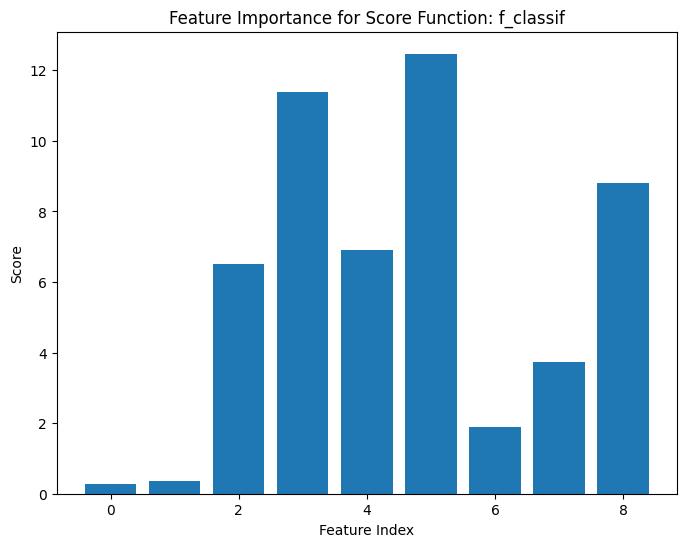

Features and Scores for Score Function: chi2
Feature: 3 Score: 32.68733535967579
Feature: 2 Score: 7.452456538170814
Feature: 4 Score: 7.08172757475083
Feature: 8 Score: 6.390577507598783
Feature: 5 Score: 6.182161361954114
Feature: 7 Score: 2.488369152970925
Feature: 6 Score: 1.0131493506493503
Feature: 1 Score: 0.325404644616467
Feature: 0 Score: 0.1042296918767511


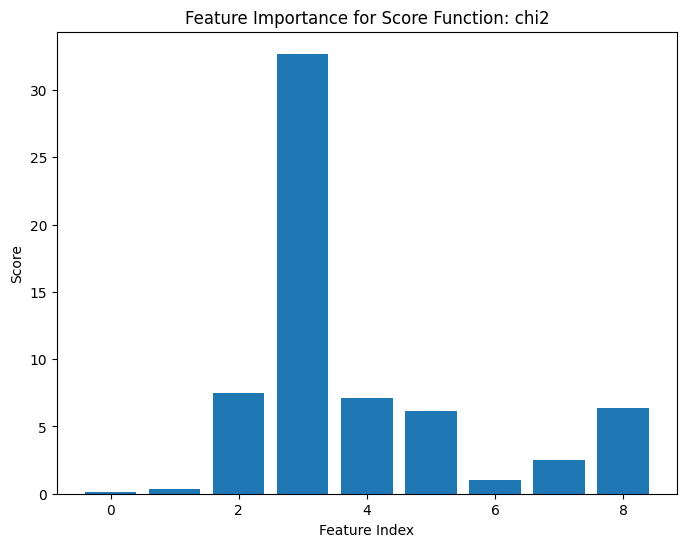

In [ ]:
dir = "/content/drive/MyDrive/Colab Notebooks/datasets/breast_cancer_all_categorical.csv"
filter_based_FS(dir, score_funcs=[f_classif, chi2])

In [ ]:
def filter_based_FS(dir, score_funcs, test_size=0.33, plot=True):
    # Load Dataset
    df = pd.read_csv(dir)
    df_values = df.values
    samples = df_values[:,:-1]
    samples = samples.astype(str)
    target = df_values[:,-1]

    # Split Dataset
    x_train, x_test, y_train, y_test = train_test_split(samples, target, test_size=test_size, random_state=1)

    # Encoding
    encoder_model = OrdinalEncoder()
    X_train = encoder_model.fit_transform(x_train)
    X_test = encoder_model.fit_transform(x_test)

    encoder_model = LabelEncoder()
    Y_train = encoder_model.fit_transform(y_train)
    Y_test = encoder_model.fit_transform(y_test)

    plt.figure(figsize=(15, 5))
    for idx, score_func in enumerate(score_funcs, start=1):
        # Filter Based Methods
        model = SelectKBest(score_func=score_func, k='all')
        model.fit(X_train, Y_train)
        x_train_model = model.transform(X_train)
        x_test_model = model.transform(X_test)

        # Plot Results
        output = pd.Series(model.scores_)
        output = output.sort_values(ascending=False)

        print(f"Features and Scores for Score Function: {score_func.__name__}")
        feature_scores = {"Feature": [], "Score": []}
        for i, out in enumerate(output):
            print(f"Feature: {output.index[i]} Score: {out}")
            feature_scores["Feature"].append(output.index[i])
            feature_scores["Score"].append(out)

        # Plot subplot
        plt.subplot(1, len(score_funcs), idx)
        plt.bar([i for i in range(len(model.scores_))], model.scores_)
        plt.title(f"Feature Importance for Score Function: {score_func.__name__}")
        plt.xlabel("Feature Index")
        plt.ylabel("Score")

    plt.tight_layout()
    plt.show()


Features and Scores for Score Function: f_classif
Feature: 5 Score: 12.47028588356106
Feature: 3 Score: 11.397986171323902
Feature: 8 Score: 8.794624481304718
Feature: 4 Score: 6.900353678149434
Feature: 2 Score: 6.510560666845982
Feature: 7 Score: 3.731022010290476
Feature: 6 Score: 1.8861077130075228
Feature: 1 Score: 0.35568561311861524
Feature: 0 Score: 0.26461155079705156
Features and Scores for Score Function: chi2
Feature: 3 Score: 32.68733535967579
Feature: 2 Score: 7.452456538170814
Feature: 4 Score: 7.08172757475083
Feature: 8 Score: 6.390577507598783
Feature: 5 Score: 6.182161361954114
Feature: 7 Score: 2.488369152970925
Feature: 6 Score: 1.0131493506493503
Feature: 1 Score: 0.325404644616467
Feature: 0 Score: 0.1042296918767511
Features and Scores for Score Function: mutual_info_classif
Feature: 1 Score: 0.06519332542473188
Feature: 2 Score: 0.029038732994797867
Feature: 4 Score: 0.024642714138209287
Feature: 6 Score: 0.019407414939877965
Feature: 0 Score: 0.017589055764201

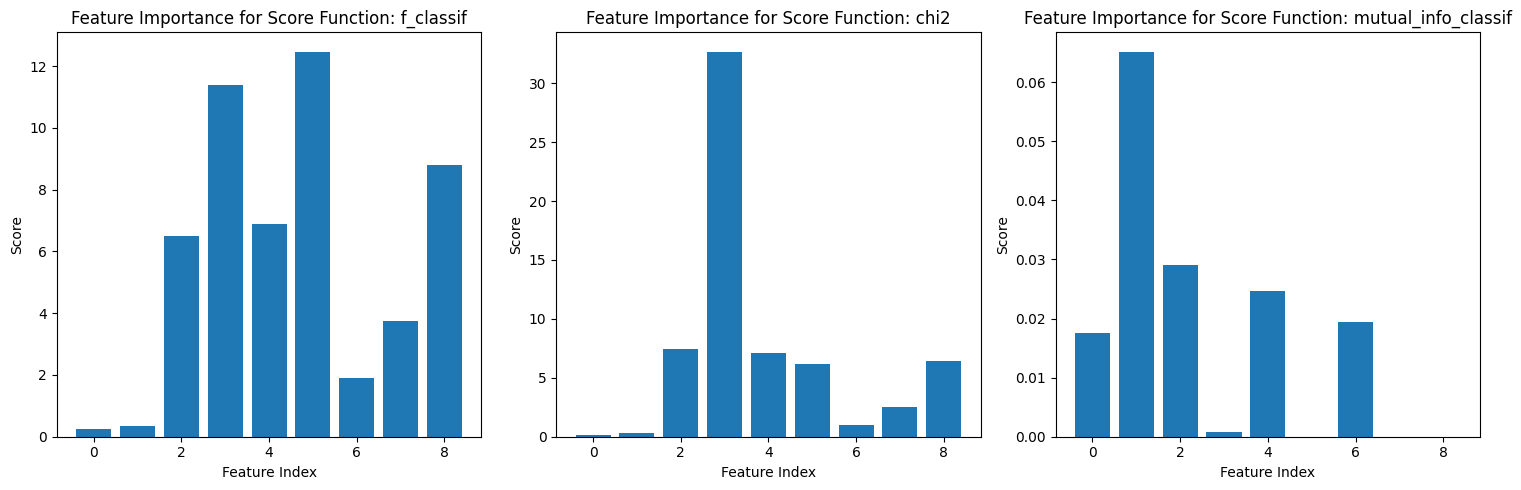

In [ ]:
dir = "/content/drive/MyDrive/Colab Notebooks/datasets/breast_cancer_all_categorical.csv"
filter_based_FS(dir, score_funcs=[f_classif, chi2, mutual_info_classif])